In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\mrabh\\Documents\\Untitled Folder'

In [4]:
dataset=pd.read_csv("D:\Data Set ML\Titanic_train.csv")

In [6]:
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
dataset.isnull().sum()/len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## PreProcessing Part -1
1. Handling Missing Value
## Preprocessing Part-2
#### Encoding Concept
1. Label Encoder(Char To Number)
2. One Hot Encoding (Change The Different columns and Values 0 and 1)
3. Dummy varibale ( N-1)
## PreProcessing Part -3
1.Outlier
## Preprocessing part -4
1.Feature Scaling
1.1 Normalization
1.2 Standrisation
## Preprocessing Part -5
1. Imbalance dataset
#### how To handle:
1. Over Sampling Method
2. By SMOTE Method

In [10]:
# Preprocessing Part 1- Handling Missing Value
dataset.isnull().sum()/len(dataset)*100 # dataset.isnull().any()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# Handling Missing value For Categorical Variable

dataset["Embarked"]= dataset["Embarked"].fillna("S")

<AxesSubplot:ylabel='Age'>

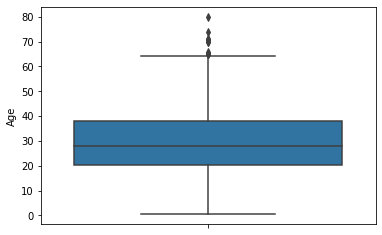

In [17]:
# handling The Missing value For Numerical Variable

#dataset["Age"].value_counts()

sns.boxplot(y="Age" , data=dataset)



In [18]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())

In [20]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
dataset=dataset.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [27]:
# Preprocessing Part-2
# Label encoding
dataset["Sex"] = dataset["Sex"].astype("category")
dataset["Sex"] = dataset["Sex"].cat.codes

dataset["Embarked"] = dataset["Embarked"].astype("category")
dataset["Embarked"] = dataset["Embarked"].cat.codes

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 36.7 KB


In [29]:
print(dataset["Sex"].value_counts())
print(dataset["Embarked"].value_counts())

1    577
0    314
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64


In [32]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [33]:
# Dummy Variable
dataset=dataset.drop(["Embarked_0"],axis=1)

In [34]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,0,0,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1


In [ ]:
# Outlier Treatment
# Feature Scaling


In [35]:
x=dataset.drop(["Survived"],axis=1)
y=dataset["Survived"]

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.47367361,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.66386103, ..., -0.47367361,
        -0.30756234, -1.62380254],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.47367361,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  2.00893337,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.47367361,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.47367361,
         3.25137334, -1.62380254]])

In [41]:
x_sc=pd.DataFrame(x_sc)

In [43]:
x_sc.head()

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.307562,0.615838
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,-0.307562,-1.623803
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.307562,0.615838
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,-0.307562,0.615838
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.307562,0.615838


In [44]:
# Imbalance Dataset
y.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# So This Is imbalance dataset Then we Go for 
# OverSampling Method
# SMOTE

In [45]:
import imblearn

In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_sc,y)
print(x_smote.shape)
print(y_smote.shape)


(1098, 7)
(1098,)


In [ ]:
# This Is ALl About Pre Processing Step in Our Model

# prior we do some visualization

<AxesSubplot:>

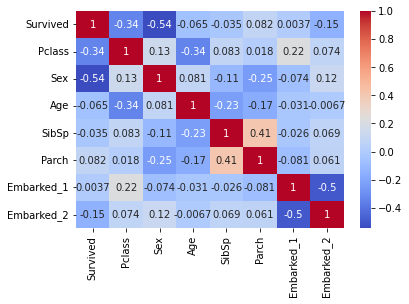

In [49]:
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

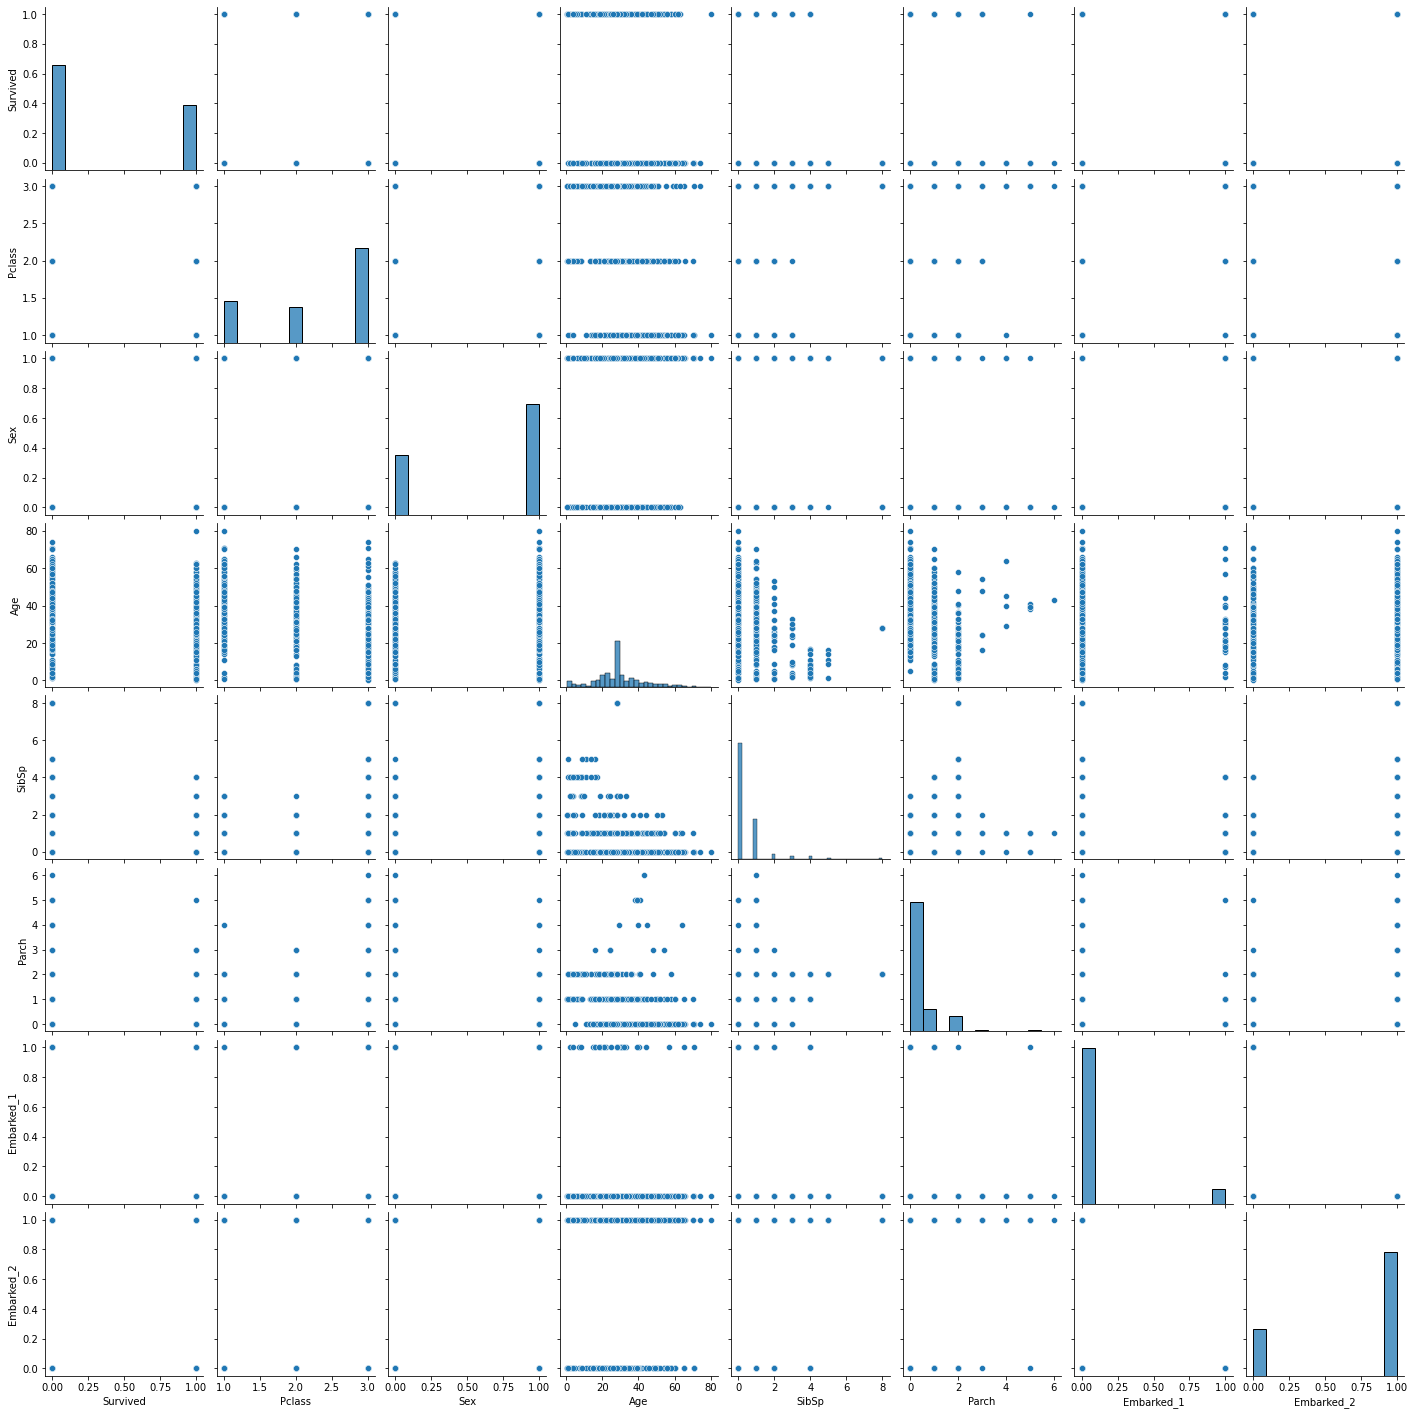

In [50]:
sns.pairplot(dataset)

In [51]:
# Now We to split The Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.25,random_state=101)

In [52]:
# We Are Ready to Build Niave Bayes Theorem
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [54]:
# Model Prediction
y_pred_nb_train=classifier_nb.predict(x_train)
y_pred_nb_test=classifier_nb.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [57]:
print(classification_report(y_train,y_pred_nb_train))
print("####"*30)
print(classification_report(y_test,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       415
           1       0.76      0.81      0.79       408

    accuracy                           0.78       823
   macro avg       0.78      0.78      0.78       823
weighted avg       0.78      0.78      0.78       823

########################################################################################################################
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       134
           1       0.75      0.78      0.76       141

    accuracy                           0.75       275
   macro avg       0.75      0.75      0.75       275
weighted avg       0.75      0.75      0.75       275



In [55]:
print(confusion_matrix(y_train,y_pred_nb_train))
print("####"*30)
print(confusion_matrix(y_test,y_pred_nb_test))

[[313 102]
 [ 77 331]]
########################################################################################################################
[[ 97  37]
 [ 31 110]]


In [56]:
print(accuracy_score(y_train,y_pred_nb_train))
print("####"*30)
print(accuracy_score(y_test,y_pred_nb_test))

0.7825030376670717
########################################################################################################################
0.7527272727272727


In [ ]:
# Niave Bayes Theorem Accuracy:
# Train-78.25%
# Test- 75.27%

In [62]:
# For Improving The Accuracy: We Go for K-folds Methos
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(classifier_nb,x_train,y_train,cv=15)
accuracy1=cross_val_score(classifier_nb,x_test,y_test,cv=15)
print(accuracy[2])
print(accuracy1[2])

0.8363636363636363
0.7368421052631579


In [64]:
# Support Vector Machine
#kernel= linear,sigmoid,polynomial,rbf
from sklearn.svm import SVC 
classifier_svm_linear=SVC(kernel="linear")
classifier_svm_linear.fit(x_train,y_train)

classifier_svm_sigmoid=SVC(kernel="sigmoid")
classifier_svm_sigmoid.fit(x_train,y_train)


classifier_svm_poly=SVC(kernel="poly")
classifier_svm_poly.fit(x_train,y_train)

classifier_svm_rbf=SVC(kernel="rbf")
classifier_svm_rbf.fit(x_train,y_train)

SVC()

In [66]:
y_pred_linear=classifier_svm_linear.predict(x_test)
y_pred_sigmoid=classifier_svm_sigmoid.predict(x_test)
y_pred_poly=classifier_svm_poly.predict(x_test)
y_pred_rbf=classifier_svm_rbf.predict(x_test)

In [67]:
# Model Evaluation

print(accuracy_score(y_test,y_pred_linear))
print("####"*25)

print(accuracy_score(y_test,y_pred_sigmoid))
print("####"*25)

print(accuracy_score(y_test,y_pred_poly))
print("####"*25)

print(accuracy_score(y_test,y_pred_rbf))
print("####"*25)

0.7745454545454545
####################################################################################################
0.6545454545454545
####################################################################################################
0.7927272727272727
####################################################################################################
0.8072727272727273
####################################################################################################


In [68]:
# Improving The score
accuracy2=cross_val_score(classifier_svm_rbf,x_train,y_train,cv=15)

In [70]:
accuracy2[4]

0.8363636363636363